# Brain Age Prediction Catboost

In [2]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [3]:
import catboost as cb
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class CatBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="CatBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
                
        self.model_ml= cb.CatBoostRegressor
        self.params = {
            'loss_function': 'RMSE',  
            'eval_metric': 'RMSE'  
        }
        
        self.params_space = {
            'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
            'depth': Integer(3, 10),
            'n_estimators': Integer(50, 2000),
            'l2_leaf_reg': Real(1, 20)
        }

c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = CatBoostRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'Purple'
nameset = 'CatBoost'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=3

#scaler = MinMaxScaler()
Scaler_reg = MinMaxScaler()



In [8]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}BrainAge_MachineLearning_MultipleModels/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = MinMaxScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [5]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

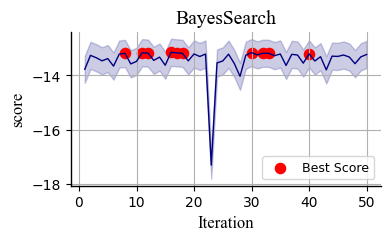

Top 1: Iteration 16, Score -13.14841705150651
Top 2: Iteration 30, Score -13.159449747650758
Top 3: Iteration 11, Score -13.161474658110455
Top 4: Iteration 17, Score -13.168191940929097
Top 5: Iteration 12, Score -13.180230522431973
Top 6: Iteration 32, Score -13.180502389333094
Top 7: Iteration 18, Score -13.187620407537736
Top 8: Iteration 33, Score -13.187685920391425
Top 9: Iteration 8, Score -13.189829358070574
Top 10: Iteration 40, Score -13.20454266717843


In [10]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [11]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.03738053925739689,
  'n_estimators': 1311},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.022715438350210993,
  'n_estimators': 1444},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.037605076567452496,
  'n_estimators': 1666},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.03543264371579781,
  'n_estimators': 1481},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.017296715711265984,
  'n_estimators': 1620},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.028064088547455707,
  'n_estimators': 1454},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.03860505970045077,
  'n_estimators': 1263},
 {'depth': 7,
  'l2_leaf_reg': 8.131393965074693,
  'learning_rate': 0.01,
  'n_estimators': 2000},
 {'depth': 7,
  'l2_leaf_reg': 18.48017530230901,
  'learning_rate': 0.05411797281355388,
  'n_estimators': 1683},
 {'depth': 6, 'l2_leaf_reg': 1.0, 'learning_rate': 0.01, 'n_estimat

In [9]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_

In [13]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [ ]:
# with open('results_model/results_training.pkl', 'wb') as f:
#     pickle.dump(results_training, f)

In [12]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [15]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar las métricas de cada fold
mae_list = []
mae_corrected_list = []
r2_list = []
r2_corrected_list = []

# Iterar sobre cada DataFrame en la lista
for df in results_per_fold_CN_test:
    # Calcular MAE y R2 para y_pred
    mae = mean_absolute_error(df['y_labels'], df['y_pred'])
    r2 = r2_score(df['y_labels'], df['y_pred'])
    
    # Calcular MAE y R2 para y_pred_corrected
    mae_corrected = mean_absolute_error(df['y_labels'], df['y_pred_corrected'])
    r2_corrected = r2_score(df['y_labels'], df['y_pred_corrected'])
    
    # Agregar los valores a las listas
    mae_list.append(mae)
    mae_corrected_list.append(mae_corrected)
    r2_list.append(r2)
    r2_corrected_list.append(r2_corrected)

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame({
    'Fold': range(1, len(results_per_fold_CN_test) + 1),
    'MAE': mae_list,
    'MAE_corrected': mae_corrected_list,
    'R2': r2_list,
    'R2_corrected': r2_corrected_list
})

# Mostrar las primeras filas del DataFrame de métricas
print(metrics_df.head())


   Fold        MAE  MAE_corrected        R2  R2_corrected
0     1  12.515581       7.159292  0.454070      0.817331
1     2  13.159642       6.914984  0.386044      0.822191
2     3  15.267294       8.782813  0.249931      0.755805
3     4  13.948194       7.256885  0.347241      0.800058
4     5  14.573856       7.585453  0.223926      0.776415


In [16]:
output_file = "results/metrics_results_per_fold.xlsx"
metrics_df.to_excel(output_file, index=False, engine='openpyxl')

In [17]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')


In [18]:
df_CN_results.to_excel('results/df_CN_results_training.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     5757.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:54:11   Log-Likelihood:                -4725.2
No. Observations:                1323   AIC:                             9454.
Df Residuals:                    1321   BIC:                             9465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1033      0.598     10.208      0.0

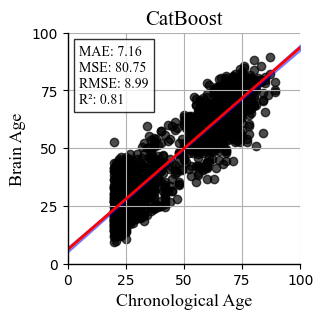

Error medio absoluto: 7.162849326212283
Error cuadrático medio: 80.74936500617585
Raíz del error cuadrático medio: 8.98606504573475
Coeficiente de determinación (R²): 0.8087330474955358


In [13]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_set
)

In [14]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('IAF_OCC_left', 2575.472857256995),
 ('IAF_OCC_right', 1884.9386466996834),
 ('Low_subj_spec_EPP_OCC_right', 1881.0270789667445),
 ('High_subj_spec_RPD_CING_right', 1394.5660947970875),
 ('High_subj_spec_EPP_CING_right', 1170.4559218383142),
 ('Low_subj_spec_RPD_CING_right', 1077.0949851099522),
 ('Alpha2_canon_EPP_HPC_left', 799.9961853456755),
 ('Alpha2_canon_RPD_HPC_left', 773.5636929493825),
 ('Alpha2_canon_EPP_PARIET_left', 771.2976574570578),
 ('Low_subj_spec_EPP_PARIET_right', 765.7958696046567),
 ('Low_subj_spec_EPP_PARIET_left', 744.9213734000692),
 ('High_subj_spec_EPP_HPC_left', 708.8867521813371),
 ('Alpha2_canon_RPD_PARIET_left', 678.8001341981925),
 ('Alpha2_canon_RPD_CING_right', 560.5106828284456),
 ('Low_subj_spec_RPD_HPC_left', 524.1493934193007),
 ('High_subj_spec_RPD_HPC_left', 509.22769563807344),
 ('High_subj_spec_RPD_CING_left', 462.8014811824876),
 ('Low_subj_spec_RPD_CING_left', 458.1069697265149),
 ('Alpha2_canon_EPP_HPC_right', 436.4878886435241),
 ('High_s

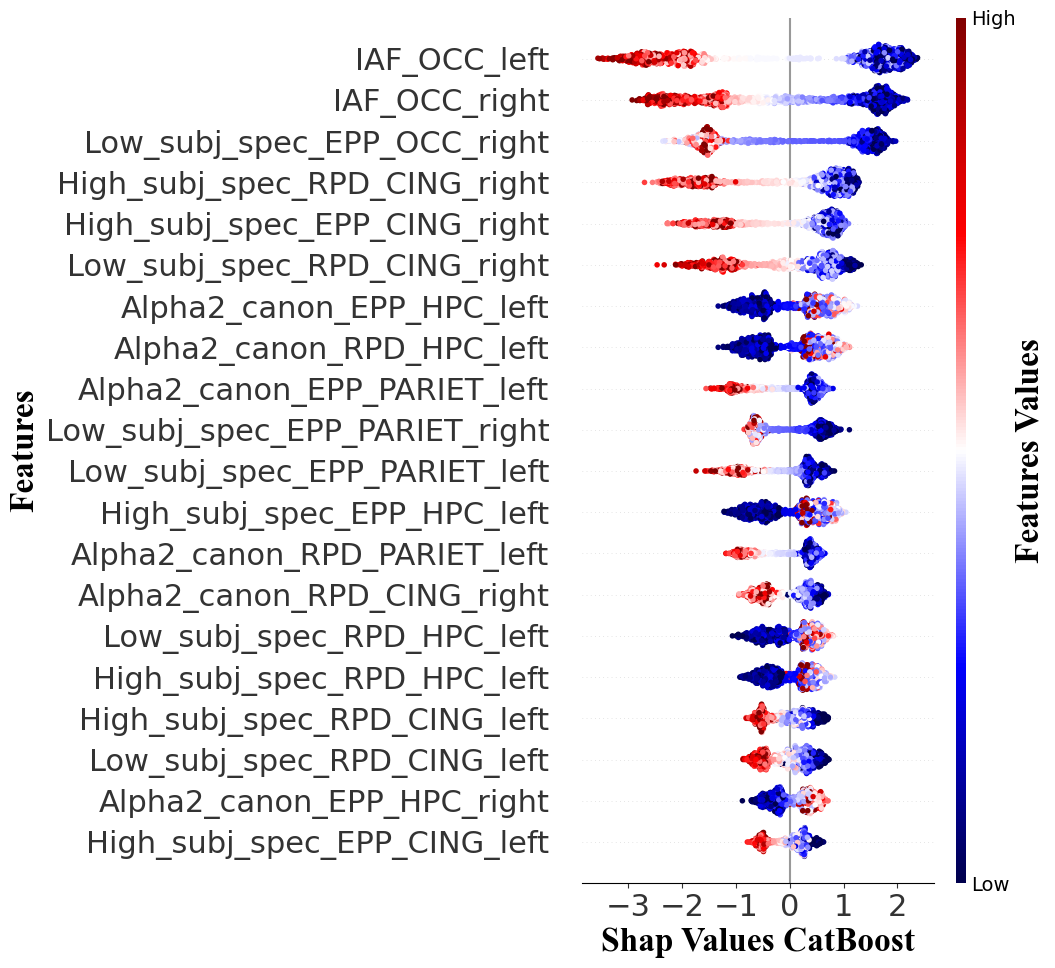

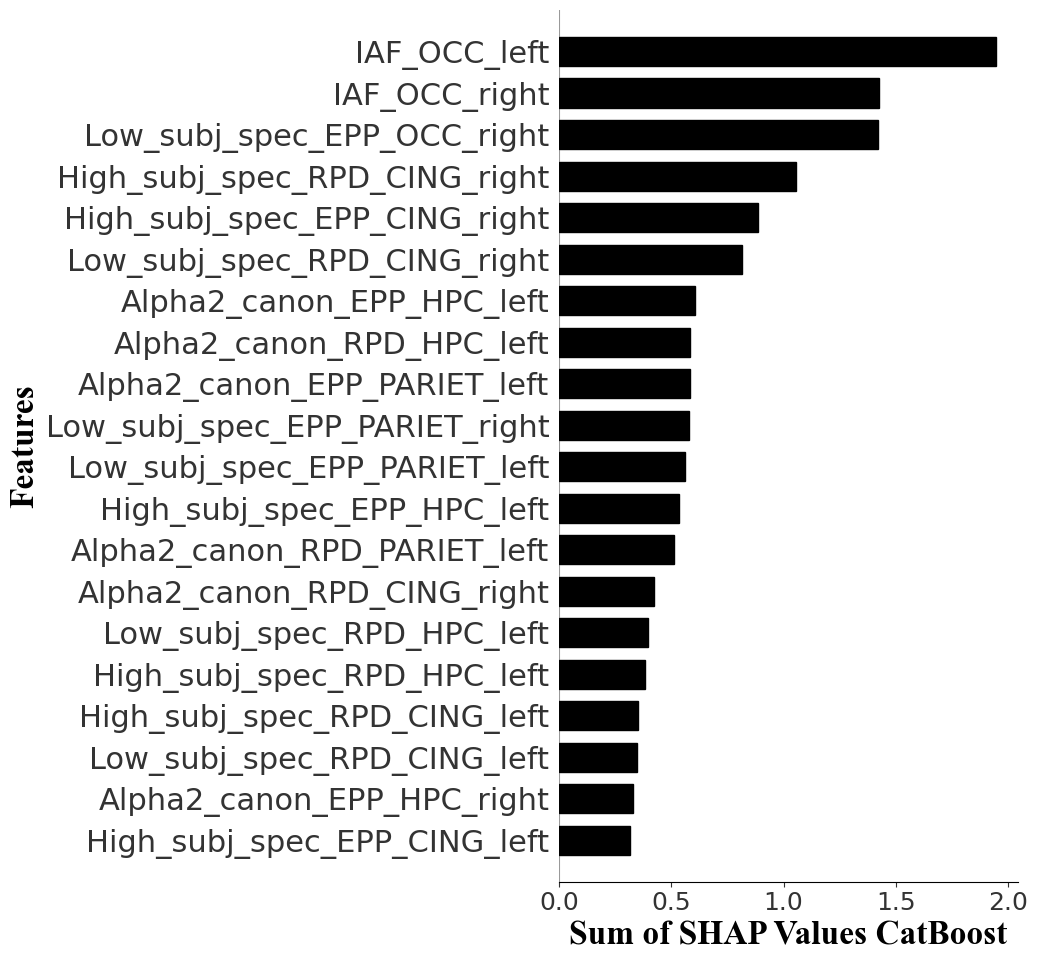

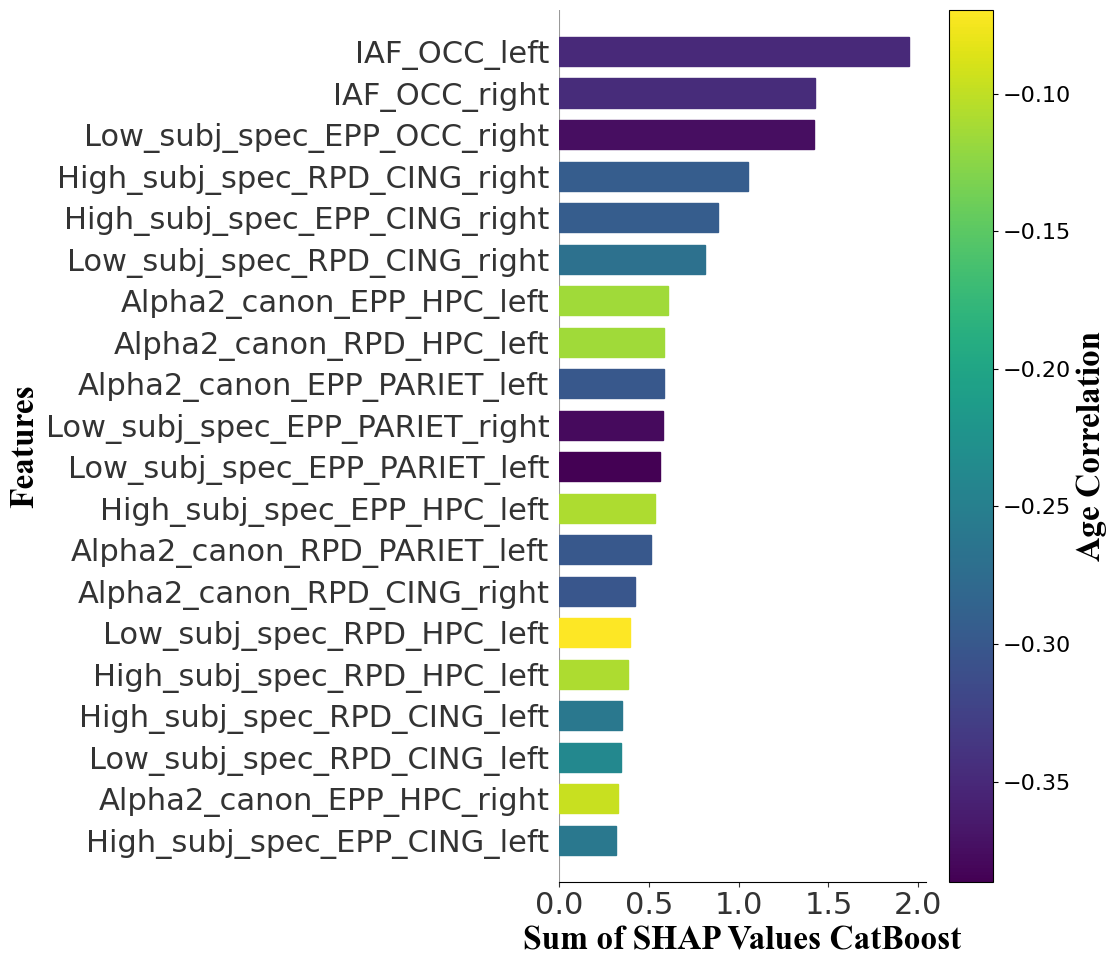

In [20]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [19]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

CING_right: 1.000000
OCC_right: 0.896098
HPC_left: 0.788988
OCC_left: 0.612824
PARIET_left: 0.522297
CING_left: 0.318281
PARIET_right: 0.182218
HPC_right: 0.103861


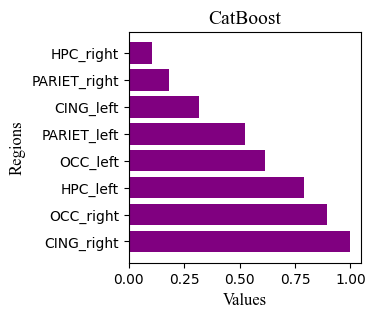

In [20]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


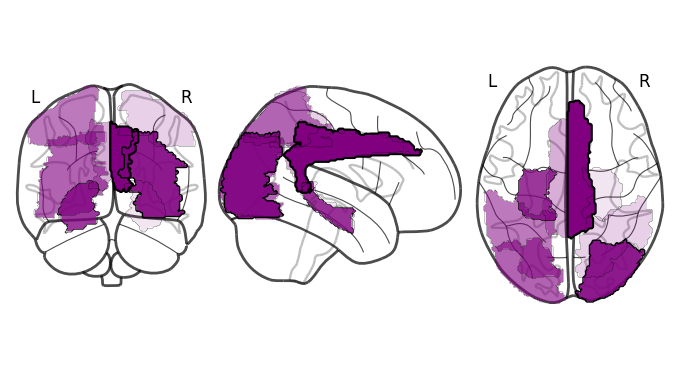

In [21]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

# Classification

In [22]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            #'gamma': Real(0.0, 10.0),
            #'min_child_weight': Integer(1, 10),
            #'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 2000),  # Número de árboles a probar
            #'n_estimators': [100]
        }

In [23]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [24]:
df_results_combined =df_CN_results

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)




C:\Users\felip\AppData\Local\Temp\ipykernel_22412\2760676698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [26]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [27]:
best_params_cls = opt_model_cls.best_params_

In [28]:
best_params_cls

OrderedDict([('colsample_bytree', 0.5060653756781581),
             ('eval_metric', 'logloss'),
             ('learning_rate', 0.01),
             ('max_depth', 3),
             ('n_estimators', 100),
             ('objective', 'binary:logistic'),
             ('reg_alpha', 1.0),
             ('reg_lambda', 0.0),
             ('subsample', 0.5)])

In [29]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:196: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [30]:
# Lista de métricas por fold
metrics_per_fold_cls = [
    model_cls.clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)
        

In [31]:
metrics_

{'AUC': [0.6848232848232848,
  0.6733084267330842,
  0.6997276916631755,
  0.7315867003367004,
  0.7066498316498315,
  0.7056752278376139,
  0.6875,
  0.7723492723492724,
  0.7392264031952911,
  0.5953439153439153,
  0.7077639751552796,
  0.7169040636782573,
  0.6998324256388772,
  0.6973544973544973,
  0.709100529100529,
  0.6721311475409836,
  0.6917978458989228,
  0.7127902155887229,
  0.6847619047619048,
  0.770023123817532,
  0.6872916666666666,
  0.736902286902287,
  0.7166666666666667,
  0.728883701188455,
  0.6739726027397259,
  0.679957805907173,
  0.7081776670817767,
  0.6746874999999999,
  0.7115009746588693,
  0.6850451585801304,
  0.6059568285595682,
  0.7605590062111802,
  0.693970893970894,
  0.7351890756302522,
  0.6918714555765594,
  0.686950146627566,
  0.6612769485903814,
  0.7255208333333334,
  0.6481481481481481,
  0.7505260942760943,
  0.7170833333333333,
  0.6368061309030655,
  0.7266045548654244,
  0.631190727081138,
  0.7527356902356902,
  0.6942714819427148,
 

In [32]:
with open("results_model/metrics_classification.pkl", "wb") as f:
    pickle.dump(metrics_, f)

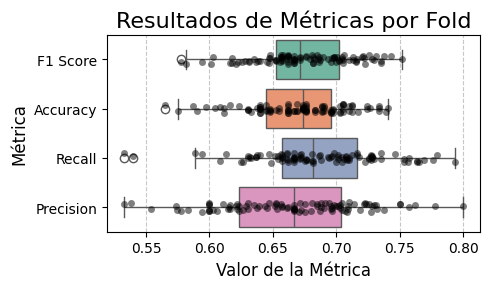

In [33]:
# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

Plotters.plot_metrics_clf(metrics_df)

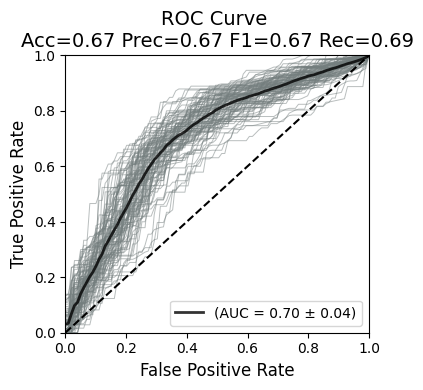

In [34]:
Plotters.graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.0)


In [35]:
import numpy as np
f_scores, f_score_std, classes = model_cls.calculate_f_scores(metrics_, results_model, threshold=0.0)
print("Promedio de F-scores:", f_scores)
print("Desviación estándar de F-scores:", f_score_std)
print("Características:", classes)

Promedio de F-scores: [57.09, 202.18, 106.47, 173.77]
Desviación estándar de F-scores: [4.349931033936055, 7.7128204957719575, 6.851941330747073, 7.772843752449937]
Características: ['Sex', 'Educ', 'MMSE', 'GINI']


In [36]:
data_to_save = {
    "f_scores": f_scores,
    "f_score_std": f_score_std,
    "classes": classes
}

# Guardar en un archivo pickle
with open("results_model/f_scores_data_classification.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

In [37]:
f_scores

[57.09, 202.18, 106.47, 173.77]

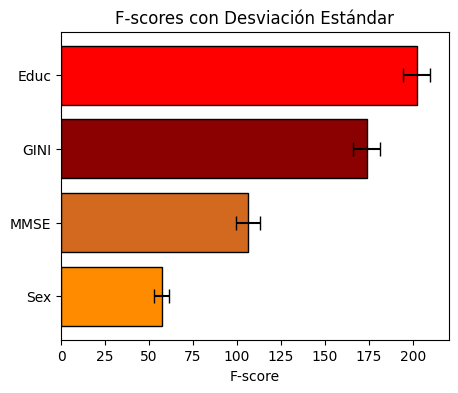

In [38]:
Plotters.plot_f_scores(f_scores, f_score_std, classes, colors=['darkorange', 'red', 'chocolate', 'darkred'],x_size=5)


In [39]:
results_model['model'][0].get_booster().get_score()

{'Sex': 55.0, 'Educ': 199.0, 'MMSE': 112.0, 'GINI': 172.0}

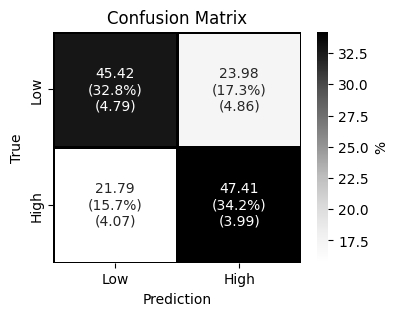

In [40]:
Plotters.C_Matrix(metrics_, threshold=0.0)

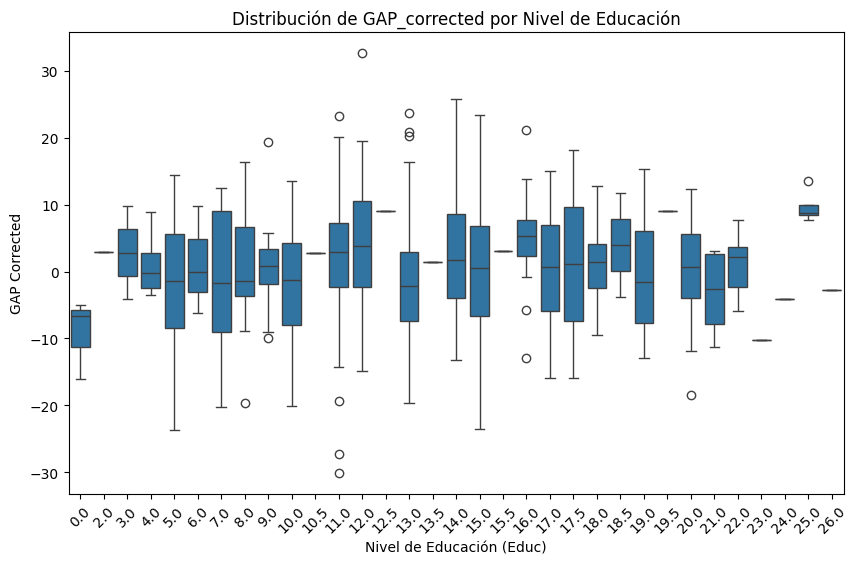

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Educ', y='GAP_corrected', data=df_results_combined)

# Personalizar el gráfico
plt.title('Distribución de GAP_corrected por Nivel de Educación')
plt.xlabel('Nivel de Educación (Educ)')
plt.ylabel('GAP Corrected')
plt.xticks(rotation=45)  # Si es necesario, rota las etiquetas del eje X para mayor claridad

# Mostrar el gráfico
plt.show()
